In [1]:
%load_ext autoreload
%autoreload 2

# ConvLSTM 
> Conv lstm model

In [2]:
from fastai2.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [3]:
torch.cuda.set_device(0)
torch.cuda.get_device_name()

'Quadro RTX 8000'

In [4]:
PATH = Path.cwd().parent/'data'
Path.BASE_PATH = PATH

IMAGE_PATH = PATH/'UCF-101-frames'
SPLIT_PATH = PATH/'ucfTrainTestlist'

In [5]:
files = get_sequence_paths(IMAGE_PATH)

In [6]:
seq_len = 20
image_size = 128
bs = 32

you could put this split on a text file:

In [7]:
#slow
val_idxs = get_split_idxs()

In [8]:
dls = get_action_dataloaders(files, bs=bs, image_size=image_size, seq_len=seq_len, val_idxs=val_idxs, random_sample=False)

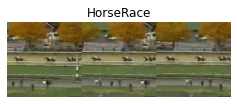

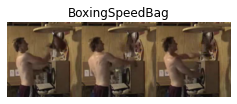

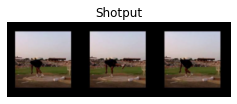

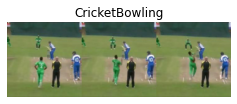

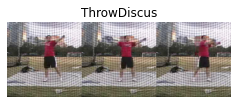

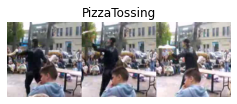

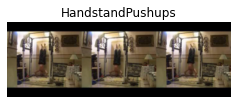

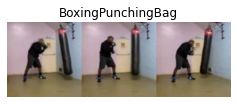

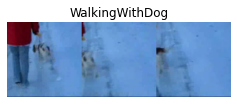

In [10]:
dls.show_batch()

## Train without attention
> We will predict over the hidden state of the sequence.

In [11]:
model = ConvLSTM(num_classes=dls.c, hidden_dim=256, lstm_layers=2, bidirectional=False, attention=False)

In [12]:
learn = Learner(dls, model, metrics=[accuracy], wd=0.1, cbs=[ModelResetter()], splitter=convlstm_splitter).to_fp16()
learn.freeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, 5e-3)

In [ ]:
learn.show_results()

## Train with attention
> We will predict with an attention layer over the full output sequence from the LSTM layer.

In [ ]:
model2 = ConvLSTM(num_classes=dls.c, hidden_dim=256, lstm_layers=2, bidirectional=True, attention=True)

In [ ]:
learn2 = Learner(dls, model2, metrics=[accuracy], wd=0.1, cbs=[ModelResetter()], splitter=convlstm_splitter).to_fp16()
learn2.freeze()

In [ ]:
learn2.lr_find()

In [ ]:
learn2.fit_one_cycle(10, 5e-3)

In [ ]:
learn2.show_results()